In [8]:
# imports
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [22]:
def convertcolor(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

Largura em pixels: 512
Altura em pixels: 512
Quantidade de canais: 3


True

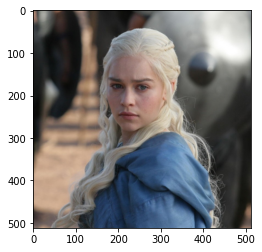

In [2]:
# leitura de uma imagem
imagem = cv2.imread('img/dany.png')

# dimensoes da imagem
print('Largura em pixels: ', end='')
print(imagem.shape[1])
print('Altura em pixels: ', end='')
print(imagem.shape[0])
print('Quantidade de canais: ', end='')
print(imagem.shape[2])

# mostra a imagem com a funcao imshow
# cv2.imshow('Nome da janela', imagem)
# cv2.waitKey(0) # esperando pressionar alguma tecla
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))

# salvar a imagem
cv2.imwrite('saida.jpg', imagem)

A imagem tem 3 canais: 3 dimensões, cada uma contendo uma das 3 cores do padrão RGB.

* Branco: RGB(255,255,255)
* Azul: RGB(0,0,255)
* Vermelho: RGB(255,0,0)
* Verde: RGB(0,255,0)
* Amarelo: RGB(255,255,0)
* Magenta: RGB(255,0,255)
* Ciano: RGB(0,255,255)
* Preto: RGB(0,0,0)

É possível representar 16.7 milhões de cores.

É utilizado o sistema de coordenadas (linha, coluna), começando de (0,0).

In [3]:
imagem = cv2.imread('img/ponte.png')
# é possível obter e alterar o valor de um pixel
(b,g,r) = imagem[0,0] # a ordem utilizada pelo opencv é bgr, não rgb

O pixel (0,0) tem as seguintes cores: 
Vermelho: 255 Verde: 255 Azul: 255


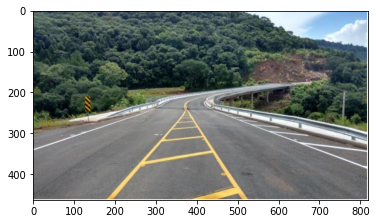

In [4]:
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))
print('O pixel (0,0) tem as seguintes cores: ')
print('Vermelho:', r, 'Verde:', g, 'Azul:', b)

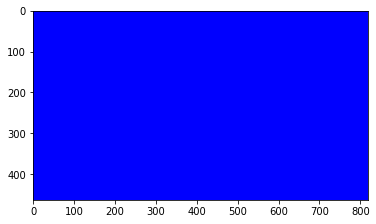

In [5]:
# também dá pra varrer uma imagem utilizando dois laços
# porém isso pode não ser muito eficiente
for y in range(0, imagem.shape[0]):     # linhas (altura)
    for x in range(0, imagem.shape[1]): # colunas (largura)
        imagem[y, x] = (255,0,0)
# cv2.imshow('Imagem modificada', imagem)
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))

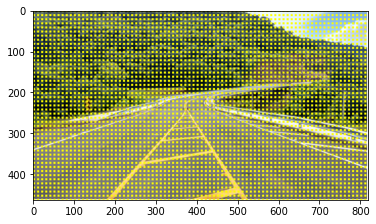

In [6]:
# saltando de 10 em 10 pixels e fazendo um 
# quadrado amarelo 5x5 em cada salto.
imagem = cv2.imread('img/ponte.png')
for y in range(0, imagem.shape[0], 10): 
    for x in range(0, imagem.shape[1], 10):
        imagem[y:y+5, x:x+5] = (0, 255, 255)
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))

## Cortando uma imagem / Crop 

True

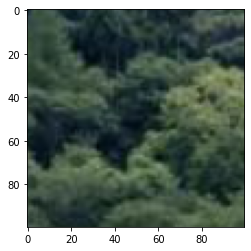

In [7]:
imagem = cv2.imread('img/ponte.png')
recorte = imagem[100:200, 100:200] # o intervalo que eu desejo da imagem
plt.imshow(cv2.cvtColor(recorte, cv2.COLOR_BGR2RGB))
cv2.imwrite('recorte.jpg', recorte)

## Redimensionamento / Resize
**resize()**

É necessário calcular a proporção da imagem para que ela não fique desproporcional.

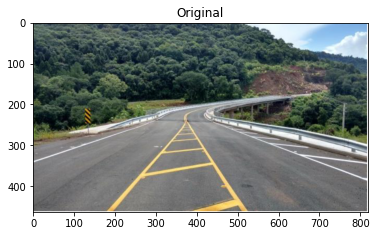

In [10]:
img = cv2.imread('img/ponte.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original')
largura = img.shape[1]
altura = img.shape[0]
proporcao = float(altura/largura)
largura_nova = 320 # pixels
altura_nova = int(largura_nova*proporcao)
tamanho_novo = (largura_nova, altura_nova)
img_redimensionada = cv2.resize(img, tamanho_novo, interpolation = cv2.INTER_AREA)

Text(0.5, 1.0, 'Resultado')

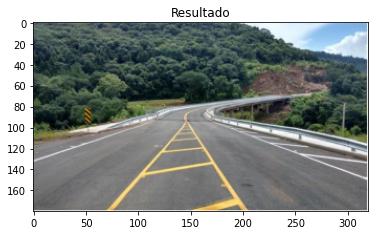

In [11]:
plt.imshow(cv2.cvtColor(img_redimensionada, cv2.COLOR_BGR2RGB))
plt.title('Resultado')

**cv2.INTER_AREA**: especificação do cálculo utilizado para redimensionar a imagem. Lembrando que redimensionar uma imagem para um tamanho maior que o original resulta em perda de qualidade.

## Espelhando uma imagem / Flip

Deve-se inverter as linhas e/ou colunas da imagem.

* Inverter colunas: flip horizontal
* Inverter linhas: flip vertical

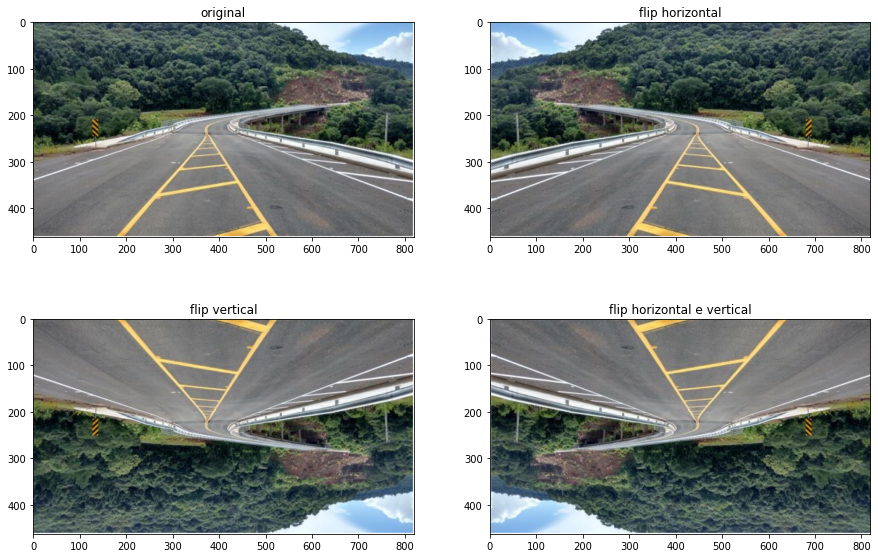

In [21]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('original')

# flip_horizontal = img[:,::-1]           # manipulação
flip_horizontal = cv2.flip(img, 1)    # funcao do opencv
flip_horizontal = cv2.cvtColor(flip_horizontal, cv2.COLOR_BGR2RGB)
plt.subplot(2,2,2), plt.imshow(flip_horizontal), plt.title('flip horizontal')

# flip_vertical = img[::-1,:]         # manipulação
flip_vertical = cv2.flip(img, 0)  # funcao do opencv
flip_vertical = cv2.cvtColor(flip_vertical, cv2.COLOR_BGR2RGB)
plt.subplot(2,2,3), plt.imshow(flip_vertical), plt.title('flip vertical')

# flip_hv = img[::-1,::-1]        # manipulação
flip_hv = cv2.flip(img, -1)   # função do opencv
flip_hv = cv2.cvtColor(flip_hv, cv2.COLOR_BGR2RGB)

plt.subplot(2,2,4), plt.imshow(flip_hv), plt.title('flip horizontal e vertical')

plt.show()

## Rotacionando uma imagem / Rotate

Text(0.5, 1.0, 'Imagem rotacionada em 30 graus')

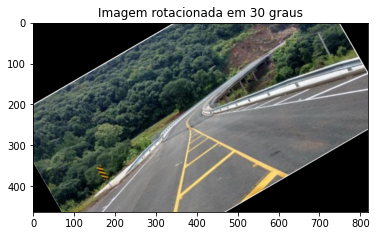

In [23]:
(alt, lar) = img.shape[:2]
centro = (lar//2, alt//2)
M = cv2.getRotationMatrix2D(centro, 30, 1.0) # rotacao de 30 graus
img_rotacionada = cv2.warpAffine(img, M, (lar, alt))
plt.imshow(convertcolor(img_rotacionada))
plt.title('Imagem rotacionada em 30 graus')